In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import pickle
%matplotlib inline

In [2]:
# load the data
data = np.load('./data/data_10000_norm.npz')

In [3]:
data.files

['arr_0', 'arr_1']

In [4]:
X = data['arr_0']
y = data['arr_1']

In [5]:
X.shape, y.shape

((5451, 10000), (5451,))

# Principal Component Analysis

In [6]:
X1 = X - X.mean(axis=0)

In [7]:
from sklearn.decomposition import PCA

In [250]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')

In [257]:
x_pca = pca.fit_transform(X1)

In [254]:
x_pca

array([[ 8.83952758e-01,  2.94038398e-01,  3.41450388e-01, ...,
         2.37491008e-04,  1.92309036e-04,  2.10500022e-04],
       [ 1.19231593e+00, -2.19408034e-01,  3.21481490e-01, ...,
         2.37491008e-04,  1.92309036e-04,  2.10500022e-04],
       [ 2.86884921e-01, -5.44903597e-01, -7.53950704e-01, ...,
         2.37491008e-04,  1.92309036e-04,  2.10500022e-04],
       ...,
       [ 8.80826514e-01, -1.48977428e+00, -4.03171174e-01, ...,
         2.37491008e-04,  1.92309036e-04,  2.10500022e-04],
       [-3.07829657e-01,  1.68044860e-01,  9.43523089e-01, ...,
         2.37491008e-04,  1.92309036e-04,  2.10500022e-04],
       [ 1.19221665e+00, -1.05759756e+00, -2.88064136e+00, ...,
         2.37491008e-04,  1.92309036e-04,  2.10500022e-04]])

In [258]:
eigen_values_ratio = pca.explained_variance_ratio_

Text(0,0.5,'Explained variance Ratio')

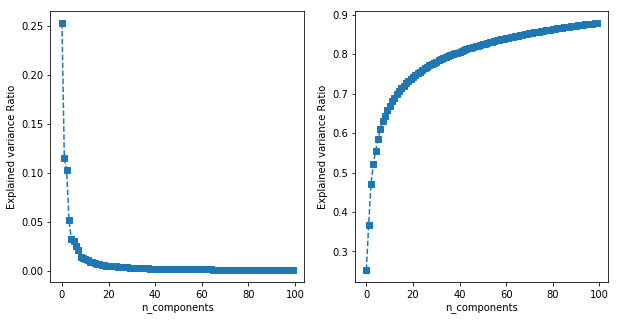

In [259]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(eigen_values_ratio[:100],'s--')
plt.xlabel('n_components')
plt.ylabel('Explained variance Ratio')

plt.subplot(1,2,2)
plt.plot(np.cumsum(eigen_values_ratio[:100]),'s--')
plt.xlabel('n_components')
plt.ylabel('Explained variance Ratio')

> Conclusion: From elbow method, optimal number of component is in the range of 25 - 30

In [8]:
pca_25 = PCA(n_components=50,whiten=True,svd_solver='auto',)

In [9]:
x_pca_25 = pca_25.fit_transform(X1)

In [10]:
x_pca_25.shape

(5451, 50)

In [11]:
x_inv_trans  = pca_25.inverse_transform(x_pca_25)

In [12]:
x_inv_trans.shape

(5451, 10000)

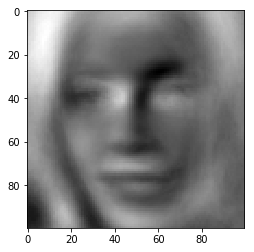

In [13]:
# consider 1st row
img1 = x_inv_trans[0,:]
img1 = img1.reshape((100,100))
plt.imshow(img1,cmap='gray')

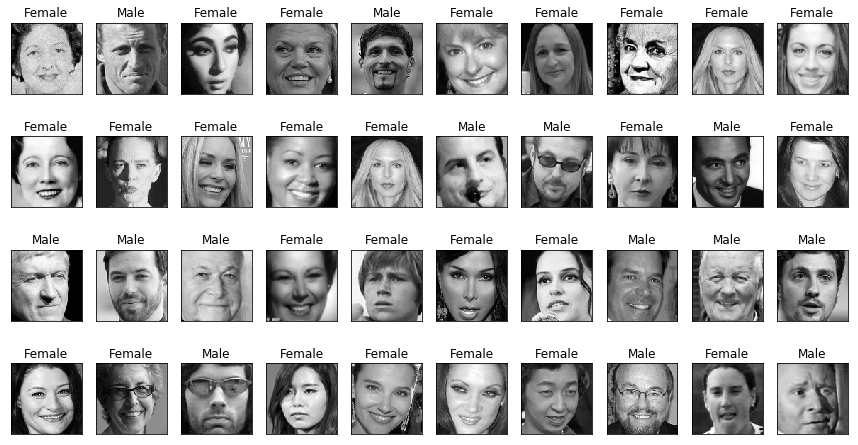

====================Eigen Images====================


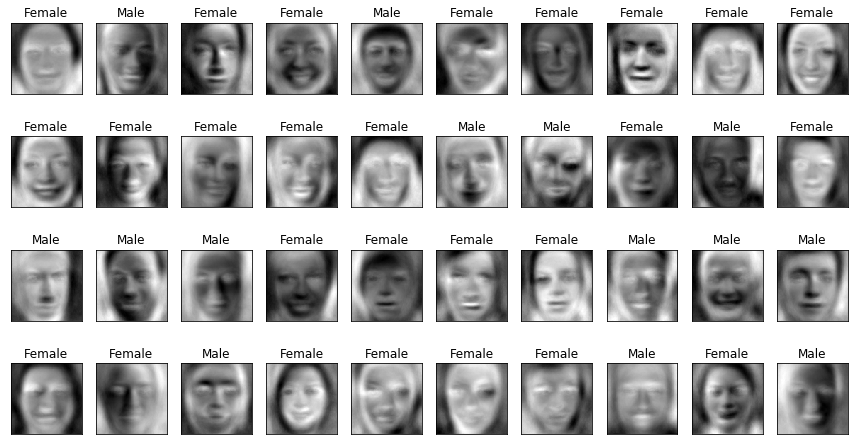

In [14]:
def label(y):
    if y==0:
        return 'Male'
    else:
        return 'Female'
    
np.random.randint(1001)
pics = np.random.randint(0,5451,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_inv_trans[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [15]:
from sklearn.svm import SVC

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_pca_25,y,train_size=0.8,stratify=y)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4360, 50), (1091, 50), (4360,), (1091,))

In [18]:
model = SVC(C=10,gamma=0.01,kernel='rbf',probability=True)

In [19]:
model.fit(x_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [20]:
model.score(x_train,y_train)

0.9651376146788991

In [21]:
model.score(x_test,y_test)

0.8157653528872594

In [22]:
y_pred = model.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

In [31]:
cr = confusion_matrix(y_test,y_pred,labels=[0,1])

In [51]:
cr = np.concatenate((cr,cr.sum(axis=1).reshape(-1,1)),axis=1)

In [54]:
cr = np.concatenate((cr,cr.sum(axis=0).reshape(1,-1)),axis=0)

In [55]:
cr

array([[ 323,  117,  440],
       [  84,  567,  651],
       [ 407,  684, 1091]], dtype=int64)

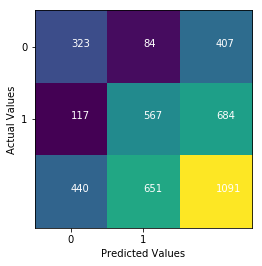

In [68]:
plt.imshow(cr) # YlGnBu
for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cr[i,j],color='w')
        
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.xticks([0,1])
plt.yticks([0,1])
plt.show()

In [76]:
cr = classification_report(y_test,y_pred,output_dict=True,target_names=['Male','Female'])
pd.DataFrame(cr).T

,precision,recall,f1-score,support
Male,0.793612,0.734091,0.762692,440.000000
Female,0.828947,0.870968,0.849438,651.000000
accuracy,0.815765,0.815765,0.815765,0.815765
macro avg,0.811280,0.802529,0.806065,1091.000000
weighted avg,0.814697,0.815765,0.814453,1091.000000


In [245]:
y_prob = model.predict_proba(x_test)

In [246]:
fpr,tpr,th = metrics.roc_curve(y_test,y_prob[:,1])

In [247]:
metrics.roc_auc_score(y_test,y_prob[:,1])

0.9272098868873061

In [248]:
'%0.2f'%th[i]

'0.94'

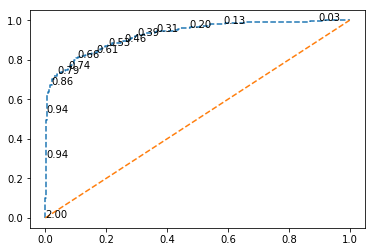

In [249]:
plt.plot(fpr,tpr,'--')
plt.plot([0,1],[0,1],'--')

for i in range(0,len(th),20):
    plt.text(fpr[i],tpr[i],'%0.2f'%th[i])

In [46]:
from sklearn.model_selection import cross_val_score

In [72]:
cross_val_score(model,x_pca_25,y,cv=10,)

array([0.77472527, 0.76556777, 0.75641026, 0.74908425, 0.76513761,
       0.77614679, 0.73027523, 0.76286765, 0.77941176, 0.71875   ])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model1 = RandomForestClassifier()

In [ ]:
model1.fit(x_train,y_train)

In [ ]:
model1.score(x_train,y_train)

In [ ]:
model1.score(x_test,y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model2 = KNeighborsClassifier(n_neighbors=9)

In [ ]:
model2.fit(x_train,y_train)

In [ ]:
model2.score(x_test,y_test)